<!--  <img width="20%" alt="EarthDaily Analytics" src="https://raw.githubusercontent.com/earthdaily/Images/main/Corporate/EarthDaily.png" style="border-radius: 15%">-->

<img width="20%" alt="EarthDaily Agro" src="https://raw.githubusercontent.com/earthdaily/Images/main/Corporate/EarthDaily_Agro.png"  style="border-radius: 15%"> 

# EDAgro Processor - Reflectance datacube from Earth Data Store
<a href="https://earthdaily.com/contact/">Give Feedback</a> | <a href="https://github.com/earthdaily">Bug report</a>

**Tags:** #EDS #timeseries #vegetation

**Author:** [Earthdaily Analytics](mailto:sales@earthdailyagro.com)

**Last update:** 2024-10-25 (Created: 2024-10-24)

**Description:** Please add a high level description of this notebook. 

**References:**
- [Earthdaily package](https://github.com/earthdaily/earthdaily-python-client) for examples
- Add reference to public scientific paper that would help legitimize the work and results below
- ...

## 1️⃣ Input

### Import dependencies

In [1]:
import geopandas as gpd
import pandas as pd
import earthdaily
from matplotlib import pyplot as plt
from earthdaily import datasets, EarthDataStore
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

### Authentication
- `eds`: Init earthdatastore with environment variables or default credentials

In [2]:
eds = EarthDataStore()

### Setup Variables
- `geometry`: geometry on which you want to generate your datacube

In [3]:
geometry = 'POLYGON((-91.29142894123093 40.395442520182684,-91.28204120967882 40.395303613502904,-91.2821806845476 40.38794932129329,-91.29167570446032 40.38808007127801,-91.29142894123093 40.395442520182684))'
start_date = "2022-03-05"
end_date = "2022-12-09"
bands=["blue", "green", "red", "nir","swir16","swir22"]
collections="sentinel-2-l2a"
mask_type="native"
min_clear_cover_percent=50

## 2️⃣ Get Data

### Get datacube

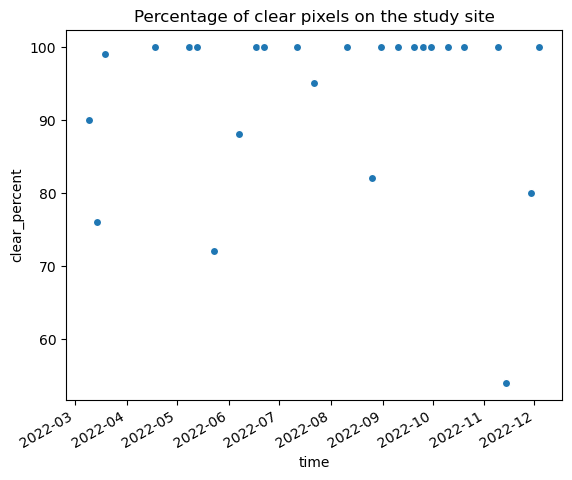

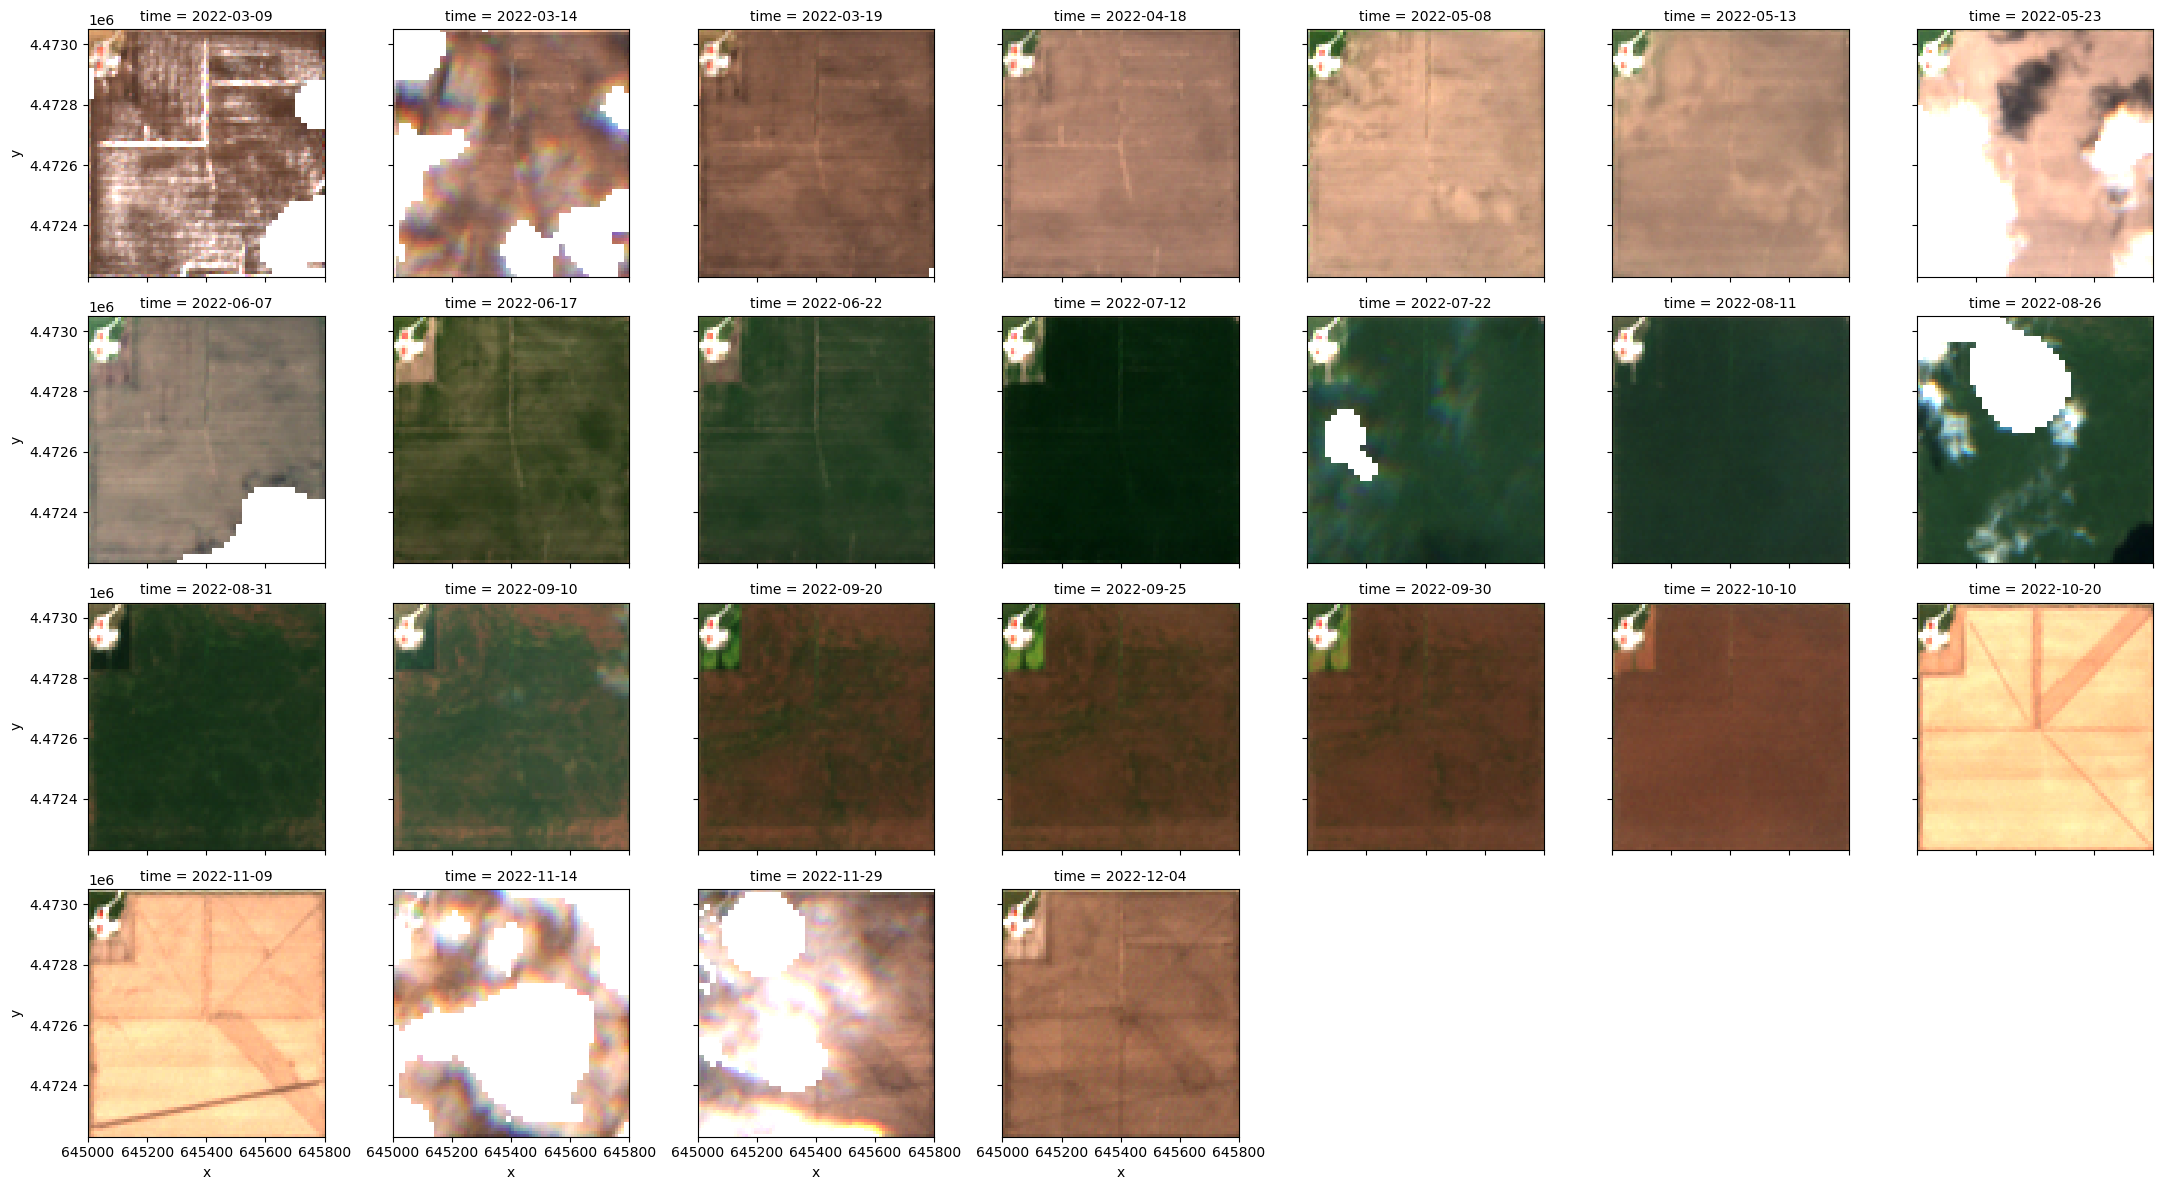

In [4]:
s2_datacube = eds.datacube(
    collections,
    assets=bands,
    intersects=geometry,
    datetime=[start_date, end_date],
    mask_with=mask_type,  # equal to "scl" for sentinel-2
    clear_cover=min_clear_cover_percent,
)

#clear previous plots
plt.clf()

s2_datacube.clear_percent.plot.scatter(x="time")
plt.title("Percentage of clear pixels on the study site")
plt.show()

s2_datacube.ed.plot_rgb(vmin=0, vmax=0.2, col="time", col_wrap=7)

### Compute NDVI

In [5]:
 # NDVI formula
def NDVI(red,nir):
    return  ((nir - red)/(nir + red))

##### NDVI images computing for all dates

In [6]:
dates_1=[]
NDVIs=[]
for date,cube_date in s2_datacube.groupby('time',squeeze=False):
    NDVIs.append(NDVI(cube_date.red,cube_date.nir))
    dates_1.append(date)
length = int(len(NDVIs)/3)
print(len(NDVIs))

25


### Compute NDTI

In [7]:
def NDTI(swir16,swir22):
    return((swir16 - swir22)/(swir16 + swir22))

##### NDVI images computing for all dates

In [8]:
dates_2=[]
NDTIs=[]
for date,cube_date in s2_datacube.groupby('time',squeeze=False):
    NDTIs.append(NDTI(cube_date.swir16,cube_date.swir22))
    dates_2.append(date)
length = int(len(NDTIs)/3)
print(len(NDTIs))

25


## 3️⃣ Outputs

### Display NDVI
##### Display NDVI maps

<Figure size 640x480 with 0 Axes>

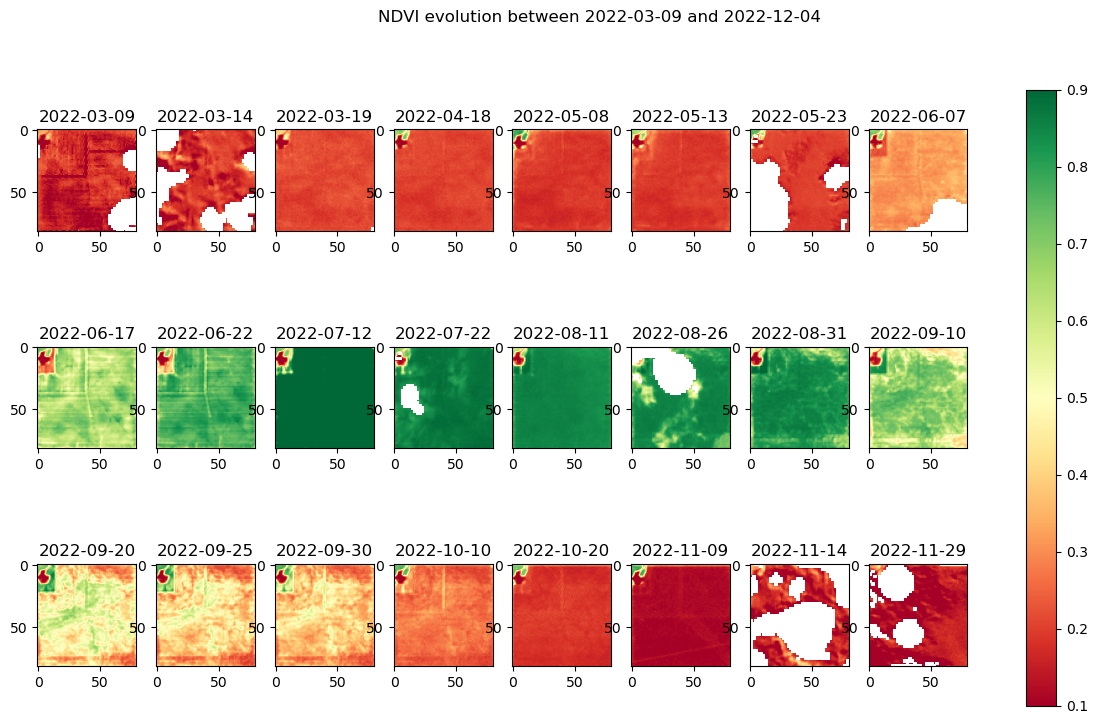

In [9]:
#clear previous plots
plt.clf()

fig, axes = plt.subplots(nrows=3, ncols=length,figsize=(15, 8))
fig.suptitle(f'NDVI evolution between {str(dates_1[0])[:10]} and {str(dates_1[-1])[:10]}')
for i, ax in enumerate(axes.flat):
    ax.set_title(str(dates_1[i])[:10])
    im = ax.imshow(NDVIs[i][0],vmin=0.1,vmax=0.9,cmap='RdYlGn')
cax,kw = mpl.colorbar.make_axes(list(axes.flat))
plt.colorbar(im, cax=cax, fraction=0.046, pad=0.04)

plt.show()

##### Display NDVI Times Serie

In [10]:
ts_1 = []
time_1 = []
for i in range(len(NDVIs)):
    y = NDVIs[i].values
    y = np.mean(y[~np.isnan(y)])
    x = NDVIs[i].time.values
    ts_1 = ts_1 + [y]
    time_1 = time_1 + [x[0]]
ts_1 = pd.DataFrame(ts_1)
time_1 = pd.DataFrame(time_1)

<Figure size 640x480 with 0 Axes>

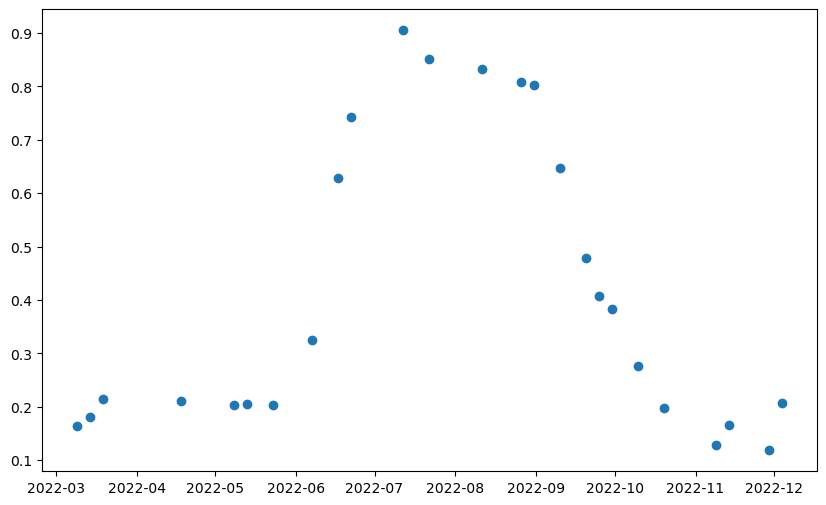

In [11]:
plt.clf()
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,6)
#plot
plt.scatter(time_1[0],ts_1[0], label=f'average MR NDVI') 
plt.show()

### Display NDTI
##### Display NDTI maps

<Figure size 640x480 with 0 Axes>

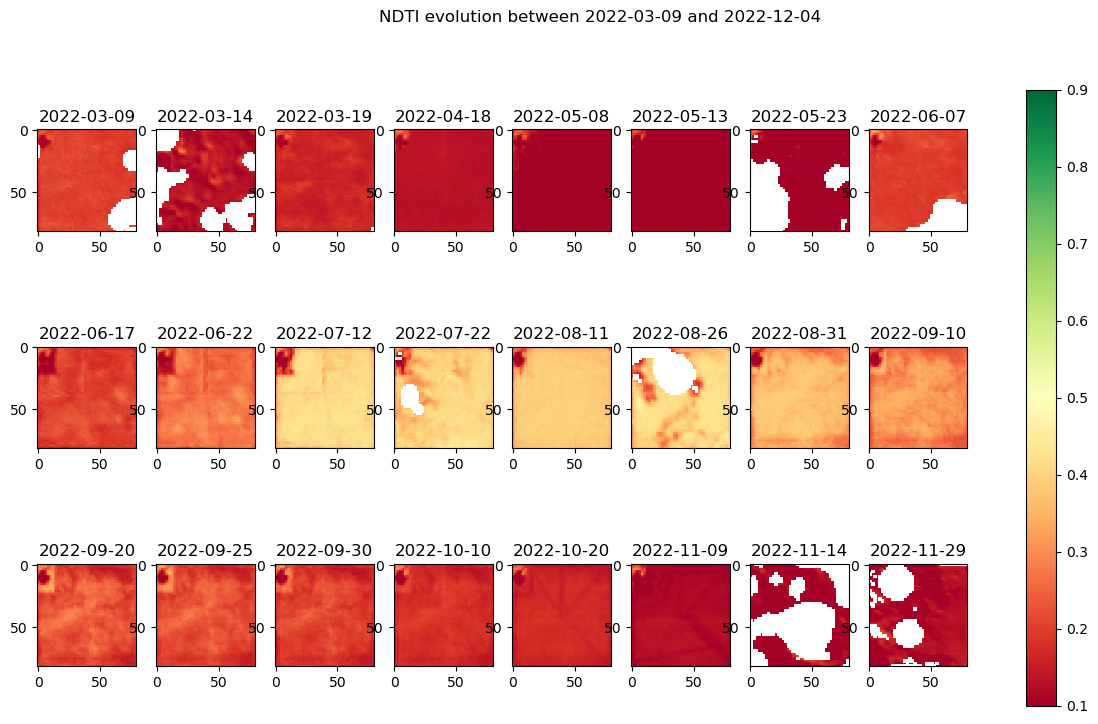

In [16]:
#clear previous plots
plt.clf()

fig, axes = plt.subplots(nrows=3, ncols=length,figsize=(15, 8))
fig.suptitle(f'NDTI evolution between {str(dates_2[0])[:10]} and {str(dates_2[-1])[:10]}')
for i, ax in enumerate(axes.flat):
    ax.set_title(str(dates_2[i])[:10])
    im = ax.imshow(NDTIs[i][0],vmin=0.1,vmax=0.9,cmap='RdYlGn')
cax,kw = mpl.colorbar.make_axes(list(axes.flat))
plt.colorbar(im, cax=cax, fraction=0.046, pad=0.04)

plt.show()

##### Display NDTI Times Serie

In [17]:
ts_2 = []
time_2 = []
for i in range(len(NDTIs)):
    y = NDTIs[i].values
    y = np.mean(y[~np.isnan(y)])
    x = NDTIs[i].time.values
    ts_2 = ts_2 + [y]
    time_2 = time_2 + [x[0]]
ts_2 = pd.DataFrame(ts_2)
time_2 = pd.DataFrame(time_2)

<Figure size 640x480 with 0 Axes>

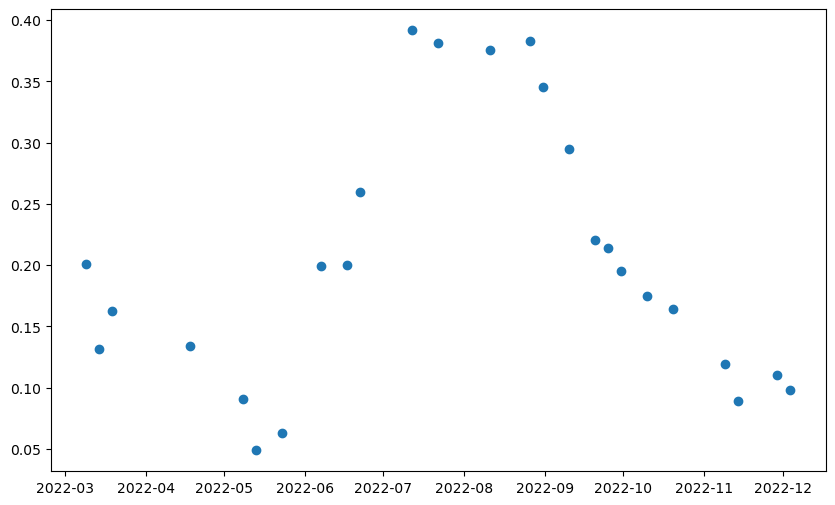

In [18]:
plt.clf()
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,6)
#plot
plt.scatter(time_2[0],ts_2[0], label=f'average MR NDTI') 
plt.show()